In [4]:
import yfinance as yf
import riskfolio as rp
import warnings
warnings.filterwarnings("ignore")

In [12]:
# portfolio tickers
assets = ["SOON.SW", "SCHN", "SPCE", "NET", "MDB", "PLTR", "TSM"]

# sort tickers
assets.sort()

#download data
data = yf.download(assets, start="2020-01-01", end="2021-12-30")

# compute non-compounding, daily returns
returns = data['Adj Close'].pct_change().dropna()

[*********************100%***********************]  7 of 7 completed


In [13]:
port = rp.Portfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

w_rp = port.rp_optimization(
    model="Classic",  # use historical
    rm="MV",  # use mean-variance optimization
    hist=True,  # use historical scenarios
    rf=0,  # set risk free rate to 0
    b=None  # don't use constraints
)

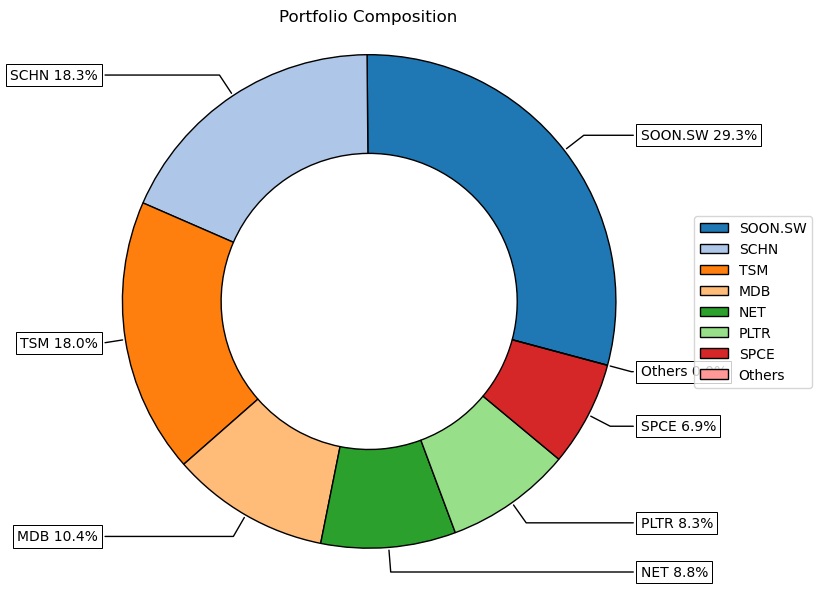

In [14]:
ax = rp.plot_pie(w=w_rp)

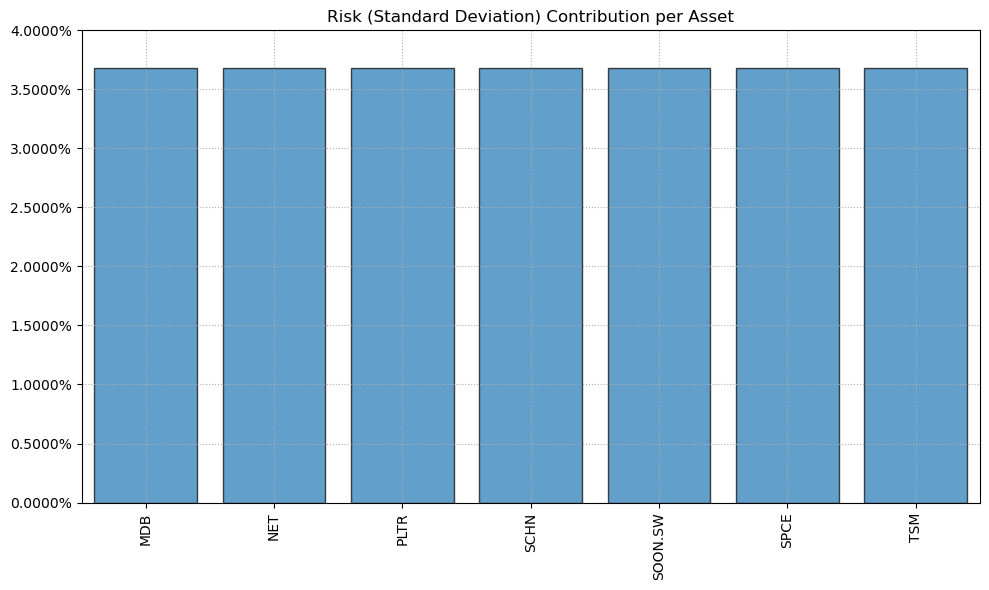

In [15]:
# show the risk contribution for each asset is equal
ax = rp.plot_risk_con(
    w_rp,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)

In [16]:
port.lowerret = 0.0008

# estimate the optimal portfolio with risk parity with the constraint
w_rp_c = port.rp_optimization(
    model="Classic",  # use historical
    rm="MV",  # use mean-variance optimization
    hist=True,  # use historical scenarios
    rf=0,  # set risk free rate to 0
    b=None  # don't use constraints
)

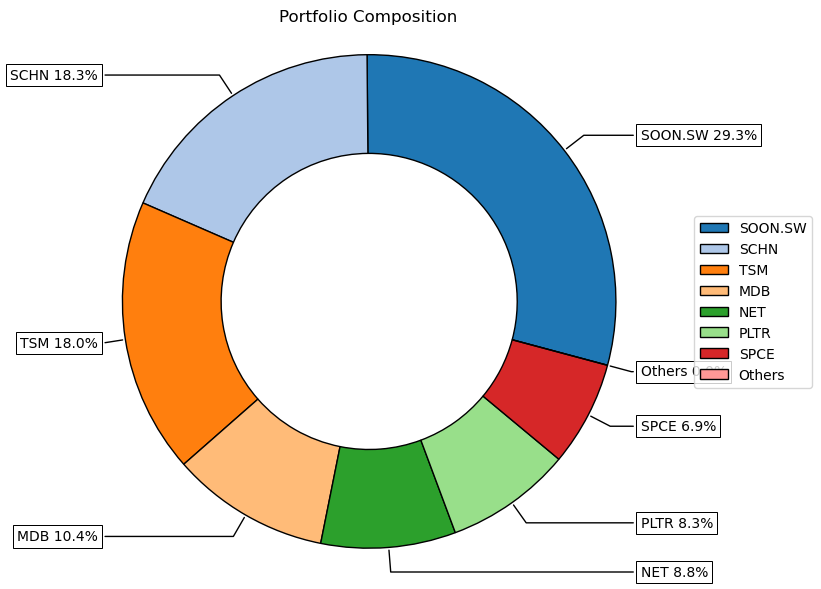

In [17]:
ax = rp.plot_pie(w=w_rp_c)

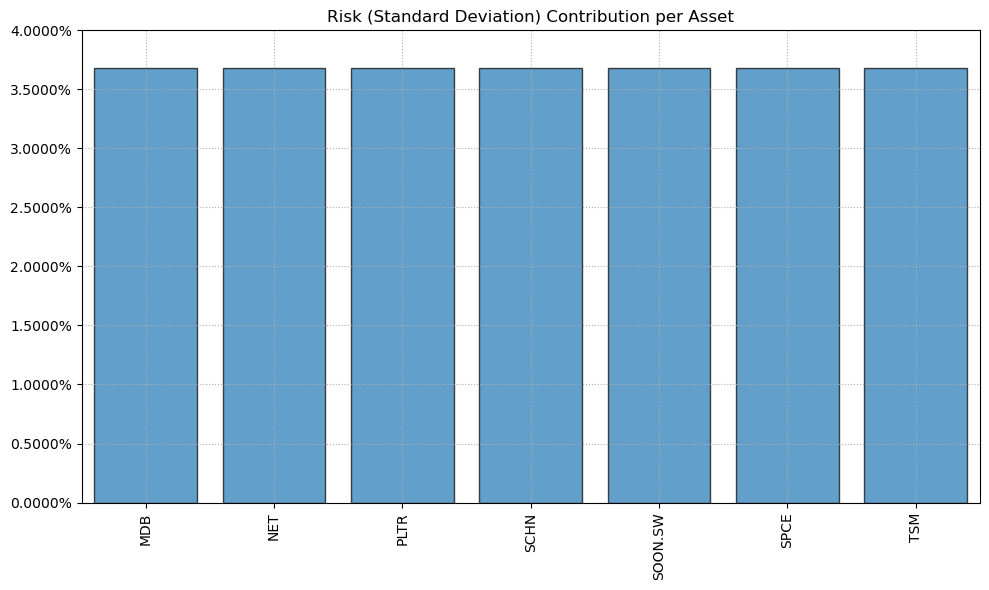

In [18]:
ax = rp.plot_risk_con(
    w_rp_c,
    cov=port.cov,
    returns=port.returns,
    rm="MV",
    rf=0,
)